In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Jeremy's Analysis

# Load Data

In [2]:
data = pd.read_csv("../data/raw/player_info.csv")
data

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


# Dataset EDA

In [3]:
data.shape

(3925, 12)

In [4]:
data.head(10)

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
5,8474668,Dale,Weise,CAN,Winnipeg,RW,1988-08-05 01:00:00,MB,"6' 2""",187.96,206.0,R
6,8473512,Claude,Giroux,CAN,Hearst,C,1988-01-12 00:00:00,ON,"5' 11""",180.34,185.0,R
7,8470645,Corey,Crawford,CAN,Montreal,G,1984-12-31 00:00:00,QC,"6' 2""",187.96,216.0,L
8,8476994,Vinnie,Hinostroza,USA,Chicago,LW,1994-04-03 01:00:00,IL,"5' 9""",175.26,173.0,R
9,8475323,Marcus,Kruger,SWE,Stockholm,C,1990-05-27 01:00:00,NaN,"6' 0""",182.88,186.0,L


In [5]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,player_id,height_cm,weight
count,3925.00000,3922.00000,3922.00000
mean,8470209.48025,185.72439,200.58669
std,8016.82182,5.36722,15.88916
min,8444894.00000,162.56000,140.00000
25%,8466403.00000,182.88000,190.00000
50%,8471490.00000,185.42000,200.00000
75%,8476419.00000,187.96000,210.00000
max,8481813.00000,205.74000,265.00000


In [6]:
data_cleaned = data.drop(['birthCity','birthDate','birthStateProvince','height'], axis='columns')
data_cleaned

,player_id,firstName,lastName,nationality,primaryPosition,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,RW,185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,D,185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,D,180.34,180.0,L
3,8466285,Brian,Campbell,CAN,D,177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,D,190.50,220.0,R
...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,LW,177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,G,185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,D,193.04,200.0,L
3923,8477574,Parker,Milner,USA,G,185.42,185.0,L


### Reasons for Cleaning 
 - With the questionswe will be aiming to amswer Player Nationality will be needed but we have decided that the town and state/province they weer born in is not releveant information.
 - Height in inches was also removed as height is also listed in centimeters which we decided would be easier to analyze and provides the same information as height in inches. 

<AxesSubplot:xlabel='primaryPosition', ylabel='height_cm'>

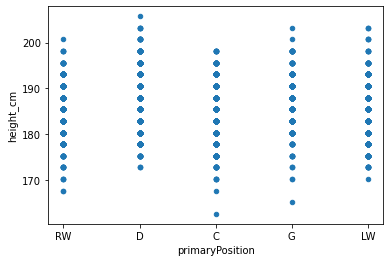

In [7]:
data_cleaned.plot(kind='scatter', x='primaryPosition', y='height_cm')

<AxesSubplot:xlabel='primaryPosition', ylabel='weight'>

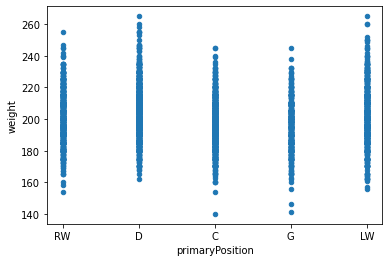

In [8]:
data_cleaned.plot(kind='scatter', x='primaryPosition', y='weight')

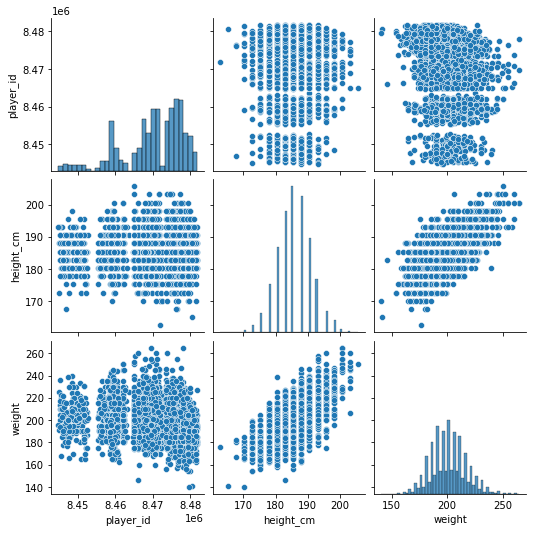

In [9]:
sns.pairplot(data_cleaned)

In [10]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,3925.0,8.470209e+06,8016.821820,8444894.00,8466403.00,8471490.00,8476419.00,8481813.00
height_cm,3922.0,1.857244e+02,5.367222,162.56,182.88,185.42,187.96,205.74
weight,3922.0,2.005867e+02,15.889161,140.00,190.00,200.00,210.00,265.00


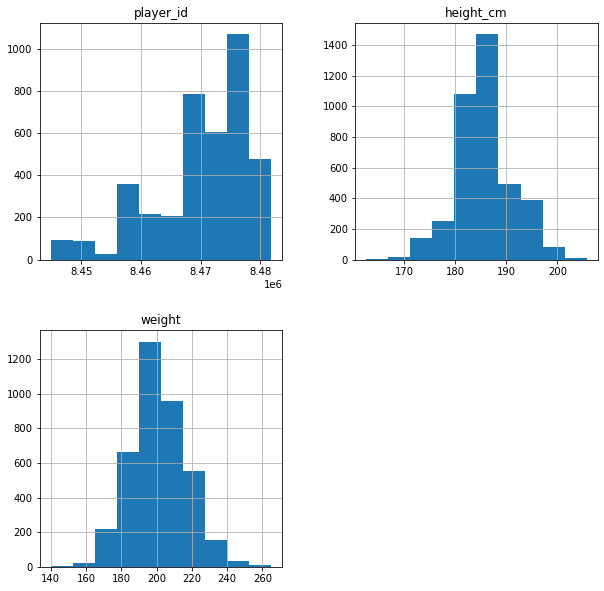

In [11]:
hist = data.hist(bins=10,figsize =(10,10))

 - The scatter plots shown alright distributions of player heights and weigth based on their position, however the information its giving is basically tellign use that there are players at every height and wight up to the maximum value.
 - The pair plot shows a great visual of how the varibles have relationships with eachother but may not be to importtant in out analysis.
 - The distribution chart shows a great visuals that will be very useful for the project, minimum and maximum and average values is great information to have available.
 - The histogram also is a great visual as it shows hot the players weight and height is distributed along with the minimum and maximum values but provides better information as to what are the most common heights and weigths.

<AxesSubplot:xlabel='count', ylabel='nationality'>

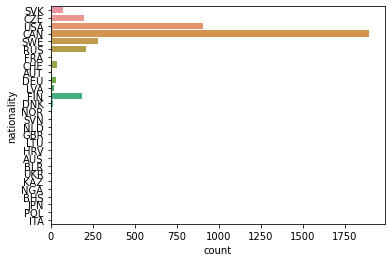

In [12]:
sns.countplot(y='nationality',data=data_cleaned)

# Analysis Pipeline

## Load Data

In [13]:
data

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


In [14]:
data.dtypes

player_id               int64
firstName              object
lastName               object
nationality            object
birthCity              object
primaryPosition        object
birthDate              object
birthStateProvince     object
height                 object
height_cm             float64
weight                float64
shootsCatches          object
dtype: object

- Data Delimeters are already set appropriately so there is no need to change them to tab, space or any others, the data is displaying in the correct way.

- These are the code lines in order to view the entire data set in full
- I am not going to run it as it will take up way to much space 

- pd.set_option('max_columns', None)
- pd.set_option('max_rows', None)

## Clean Data

In [15]:
data.shape

(3925, 12)

In [16]:
data_cleaned2 = data.drop(['birthCity','birthDate','birthStateProvince','height'], axis='columns')

In [17]:
data_cleaned2.head(20)

,player_id,firstName,lastName,nationality,primaryPosition,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,RW,185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,D,185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,D,180.34,180.0,L
3,8466285,Brian,Campbell,CAN,D,177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,D,190.50,220.0,R
5,8474668,Dale,Weise,CAN,RW,187.96,206.0,R
6,8473512,Claude,Giroux,CAN,C,180.34,185.0,R
7,8470645,Corey,Crawford,CAN,G,187.96,216.0,L
8,8476994,Vinnie,Hinostroza,USA,LW,175.26,173.0,R
9,8475323,Marcus,Kruger,SWE,C,182.88,186.0,L


- As far as I can tell all the data is complete that I will be using and it seems to be correct

## Process Data

- As of know there isnt information we decided that we needed to add to our dataset.
- This may change as we work through the project so in the future we may merge another dataset or add comumns of information.

In [18]:
data2 = data_cleaned2.set_index('primaryPosition')

In [19]:
data2

,player_id,firstName,lastName,nationality,height_cm,weight,shootsCatches
primaryPosition,,,,,,,
RW,8466148,Marian,Hossa,SVK,185.42,207.0,L
D,8465058,Michal,Rozsival,CZE,185.42,210.0,R
D,8476906,Shayne,Gostisbehere,USA,180.34,180.0,L
D,8466285,Brian,Campbell,CAN,177.80,192.0,L
D,8470607,Brent,Seabrook,CAN,190.50,220.0,R
...,...,...,...,...,...,...,...
LW,8479374,Adam,Mascherin,CAN,177.80,205.0,L
G,8479403,Tyler,Parsons,USA,185.42,185.0,L
D,8480970,Marcus,Hogstrom,SWE,193.04,200.0,L


- Changed the player postion to the index as it will make for easier data analysis

In [20]:
data2.rename(index = {"G": "Goalie",
                     "D":"Defence",
                      "RW":"Right Wing",
                      "LW":"Left Wing",
                      "C":"Center"},
                                 inplace = True)

In [21]:
data2

,player_id,firstName,lastName,nationality,height_cm,weight,shootsCatches
primaryPosition,,,,,,,
Right Wing,8466148,Marian,Hossa,SVK,185.42,207.0,L
Defence,8465058,Michal,Rozsival,CZE,185.42,210.0,R
Defence,8476906,Shayne,Gostisbehere,USA,180.34,180.0,L
Defence,8466285,Brian,Campbell,CAN,177.80,192.0,L
Defence,8470607,Brent,Seabrook,CAN,190.50,220.0,R
...,...,...,...,...,...,...,...
Left Wing,8479374,Adam,Mascherin,CAN,177.80,205.0,L
Goalie,8479403,Tyler,Parsons,USA,185.42,185.0,L
Defence,8480970,Marcus,Hogstrom,SWE,193.04,200.0,L


- Also renamed the titles of the index player positions for an easier data analysis

## Wrangle Data

- At this point wrangling data will not beenfit us greatly and to some degree the dataset has seen changes such as changing the index column that can be counted as wrangling data

# Method Chain

In [22]:
data 

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


In [23]:
data1 = (data.drop('height', axis=1)
        .drop('birthCity', axis=1)
        .drop('birthDate', axis=1)
        .drop('birthStateProvince', axis=1)
        .rename(columns={"player_id": "Player ID"})
        .set_index('primaryPosition')                                       
        .rename(index={"D": "Defence"})
        .rename(index={"G": "Goalie"})
        .rename(index={"C": "Center"})
        .rename(index={"RW": "Right Wing"})
        .rename(index={"LW": "Left Wing"}) 
         
        )



In [24]:
data1

,Player ID,firstName,lastName,nationality,height_cm,weight,shootsCatches
primaryPosition,,,,,,,
Right Wing,8466148,Marian,Hossa,SVK,185.42,207.0,L
Defence,8465058,Michal,Rozsival,CZE,185.42,210.0,R
Defence,8476906,Shayne,Gostisbehere,USA,180.34,180.0,L
Defence,8466285,Brian,Campbell,CAN,177.80,192.0,L
Defence,8470607,Brent,Seabrook,CAN,190.50,220.0,R
...,...,...,...,...,...,...,...
Left Wing,8479374,Adam,Mascherin,CAN,177.80,205.0,L
Goalie,8479403,Tyler,Parsons,USA,185.42,185.0,L
Defence,8480970,Marcus,Hogstrom,SWE,193.04,200.0,L


In [25]:
## Step2
"../data/raw/player_info.csv"

'../data/raw/player_info.csv'

In [26]:
def load_and_process():


        df1 = (
                pd.read_csv("../data/raw/player_info.csv")
                .drop('height', axis=1)
                .drop('birthCity', axis=1)
                .drop('birthDate', axis=1)
                .drop('birthStateProvince', axis=1)
        )
        
        
        
        df2 = (
                df1
                .rename(columns={"player_id": "Player ID"})
                .set_index('primaryPosition')                                       
                .rename(index={"D": "Defence"})
                .rename(index={"G": "Goalie"})
                .rename(index={"C": "Center"})
                .rename(index={"RW": "Right Wing"})
                .rename(index={"LW": "Left Wing"})
        )
        
        return df2
  

In [27]:
load_and_process()

,Player ID,firstName,lastName,nationality,height_cm,weight,shootsCatches
primaryPosition,,,,,,,
Right Wing,8466148,Marian,Hossa,SVK,185.42,207.0,L
Defence,8465058,Michal,Rozsival,CZE,185.42,210.0,R
Defence,8476906,Shayne,Gostisbehere,USA,180.34,180.0,L
Defence,8466285,Brian,Campbell,CAN,177.80,192.0,L
Defence,8470607,Brent,Seabrook,CAN,190.50,220.0,R
...,...,...,...,...,...,...,...
Left Wing,8479374,Adam,Mascherin,CAN,177.80,205.0,L
Goalie,8479403,Tyler,Parsons,USA,185.42,185.0,L
Defence,8480970,Marcus,Hogstrom,SWE,193.04,200.0,L


# Data Analysis

## Imoprt Data Table

In [28]:
data

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


The following is the csv file from our dataset called player_info displayed using pandas. The information presented includes the players apart of the National Hockey League along with demographic information and portions or basic hockey information. The demographic information includes where the player was born including the country the state/province, the city and their birth date. Furthermore, their heights in both centimeters and inches is inlcuded along with their weights in pounds. The hockey information that is included is simple variables including what position they play and which hand they shoot with. Not all the information in the dataset will be used and futher along the analysis it will be cleaned. 

# Clean and Wrangle Data

In [29]:
dataClean = (data.drop('height', axis=1)
        .drop('birthCity', axis=1)
        .drop('birthDate', axis=1)
        .drop('birthStateProvince', axis=1)
        .rename(columns={"player_id": "Player ID"})                                       
        .rename(index={"D": "Defence"})
        .rename(index={"G": "Goalie"})
        .rename(index={"C": "Center"})
        .rename(index={"RW": "Right Wing"})
        .rename(index={"LW": "Left Wing"}) 
         
        )

In [30]:
dataClean

,Player ID,firstName,lastName,nationality,primaryPosition,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,RW,185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,D,185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,D,180.34,180.0,L
3,8466285,Brian,Campbell,CAN,D,177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,D,190.50,220.0,R
...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,LW,177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,G,185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,D,193.04,200.0,L
3923,8477574,Parker,Milner,USA,G,185.42,185.0,L


Here I created a function that cleans and wrangles the information that I want all at one time. From the dataset1 the changes i have made include making the players position as the index along with changing the RW, LW, D, C, and G variables to say Right Wing, Left Wing, Defence, Center, and Goalie instead making it easier to read. Futhermore the rows of birthcity, birthdate, and birthStateProvince have all been dropped as I have deemed them not necessary for my analysis. 

# Research Question

The area I have decided to focus on for this dataset is looking at the position of the players and seeing if there is a more prominant heigth and weight for those certain positions. For example players in defence are generally seen as bigger than some more of the skilled forwards in the league. With this analysis I will see if infact most defence have a higher height and weight compared to the other players. 

# Analyze Data

In [31]:
dataClean.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Player ID,height_cm,weight
count,3925.00000,3922.00000,3922.00000
mean,8470209.48025,185.72439,200.58669
std,8016.82182,5.36722,15.88916
min,8444894.00000,162.56000,140.00000
25%,8466403.00000,182.88000,190.00000
50%,8471490.00000,185.42000,200.00000
75%,8476419.00000,187.96000,210.00000
max,8481813.00000,205.74000,265.00000


Here I have created a table that displays information regarding the average, maximum and minimum values for the numerical data within the cleaned dataset. They Player ID column isn't important for this particular table as they are just used to tell who the players are in the other datasets. The average, maximum and minumum values of the player weights and heights can be used to answer potential question for the research question.

<AxesSubplot:xlabel='height_cm', ylabel='weight'>

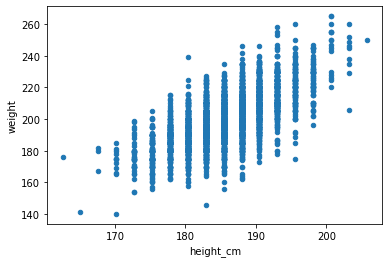

In [32]:
dataClean.plot(kind='scatter', x='height_cm', y='weight')

This scatter plot graph is able to show the distribution of weights at different heights. Overall this graph esentailly shows us that for almost all the weights there are players that vary in weight from 140 pounds up to roughly 250 pounds. 

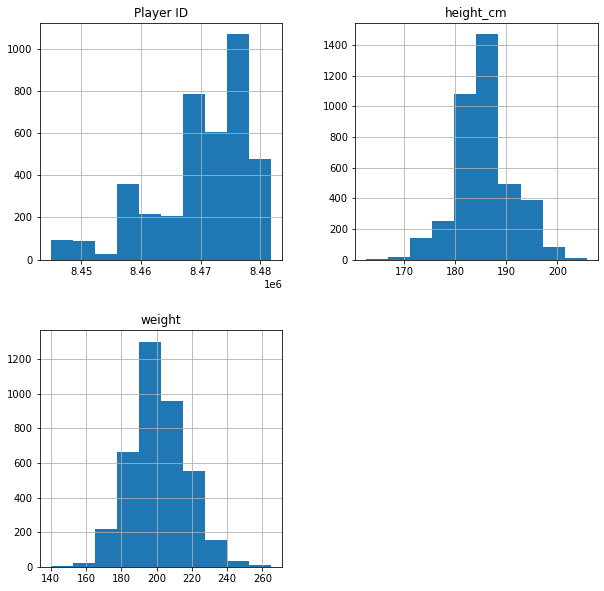

In [33]:
hist = dataClean.hist(bins=10,figsize =(10,10))

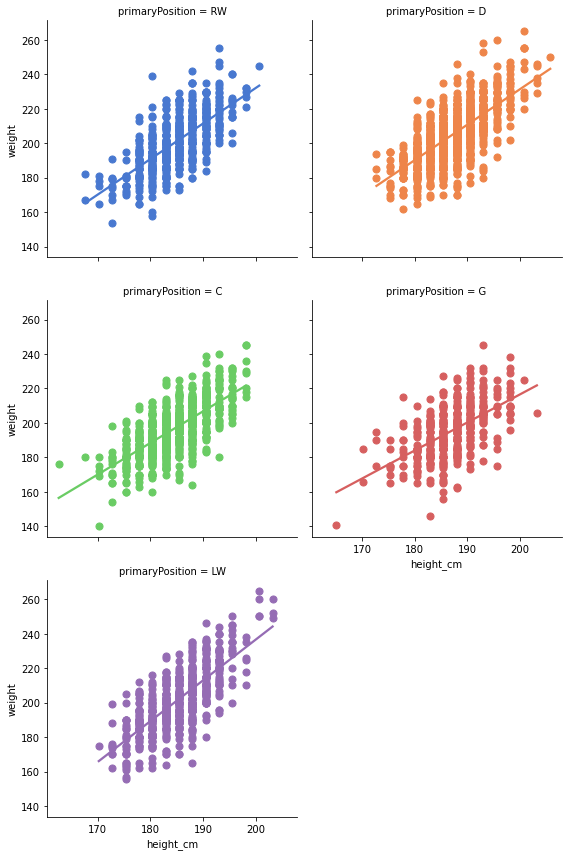

In [34]:
imp = sns.lmplot(x="height_cm", y="weight", col="primaryPosition", hue="primaryPosition", data=dataClean,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

This implot graph shows very similar results to the scatter plot used earlier except it breaks it down into position and would be usefull more than just the scatter plot since the reasearch question is looking at each individual position.

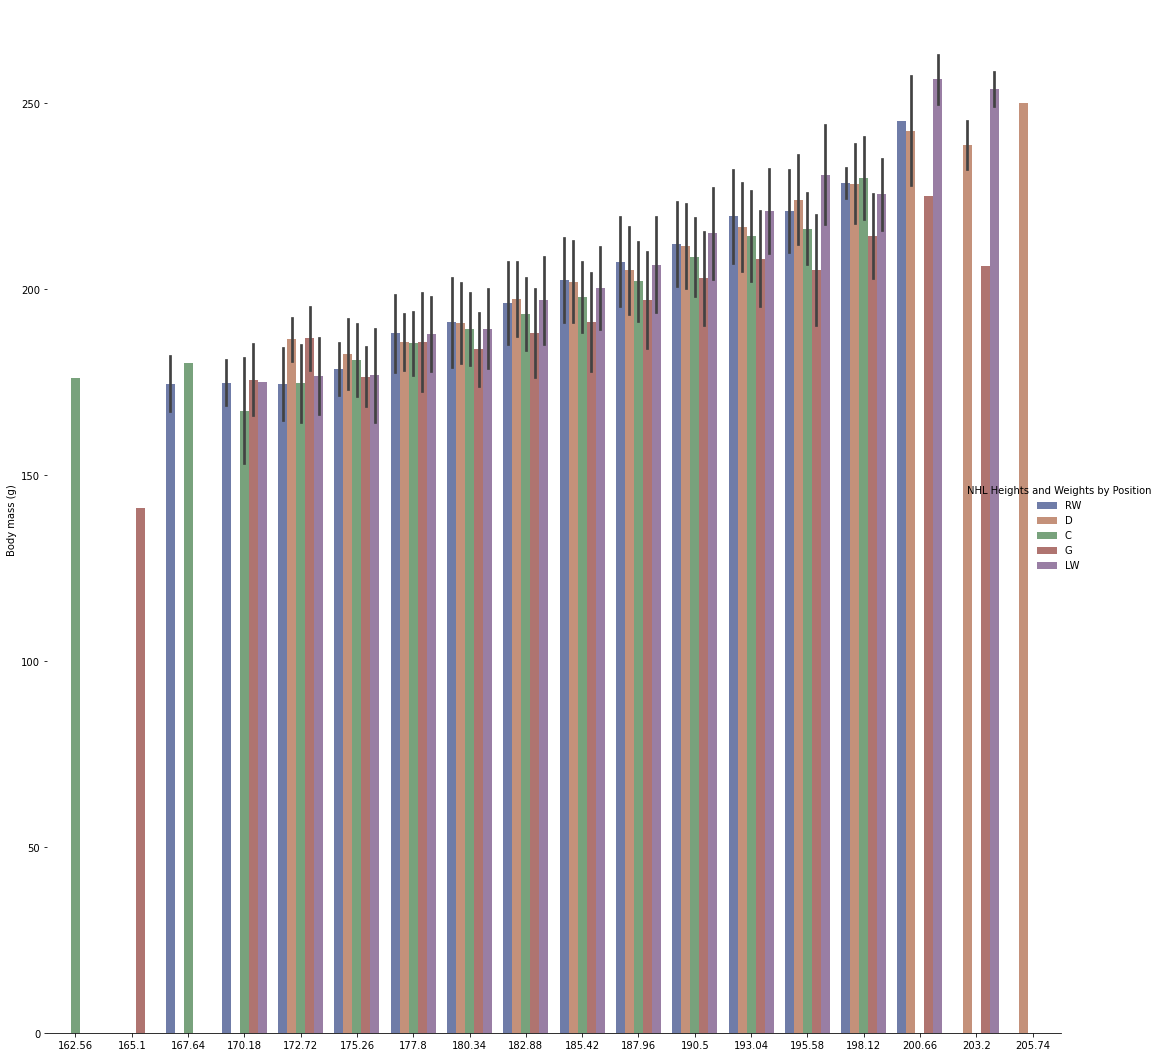

In [35]:

g = sns.catplot(
    data=dataClean, kind="bar",
    x="height_cm", y="weight", hue="primaryPosition",
    ci="sd", palette="dark", alpha=.6, height=15
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("NHL Heights and Weights by Position")


This cat plot graph is very useful as it breaksdown the heighs and which player positions are present at each. Then with that information it adds teh weight of the players. As shown the shortest player at 162.56 cm is player at a center postion. The next smallest player is a goalie and weighs less than the center by a signifigant amount. The shortest recorded defenceman is at 172.72 cm which is tallest-shortest player in the league. On the other side of the graph we can see that the tallest player is a defenceman. With this graph you can start to see a pattern that defenceman seem to be taller than all other positions, however the weights still seem to be similar amoung the positions.